In [111]:
import os
import numpy as np
import netCDF4
import datetime
import logging
import cmocean
import calendar
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
logger = logging.getLogger("WOA-Plots")
logger.setLevel(logging.INFO)
logging.info("Sarting")

In [4]:
dataurl = "https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/temperature/A5B7/0.25/woa18_A5B7_t00_04.nc"

## Select the fields for the region of interest

### Load the coordinates from the SDN product

In [51]:
datadir1 = "/home/ctroupin/Projects/SeaDataCloud/Julia/Climatologies/NorthSea/output/"
temperature_year_sdc0 = os.path.join(datadir1, "SDN/Water_body_Temperature_NorthSea.4Danl_annual.nc")

### Find the good WOA coordinates

In [71]:
lonmin, lonmax, latmin, latmax, dmin, dmax, datemin, datemax = \
get_SDN_domain(temperature_year_sdc0)

goodlon = (lonWOA >= lonmin) & (lonWOA <= lonmax)
goodlat = (latWOA >= latmin) & (latWOA <= latmax)
gooddepth = (depthWOA >= dmin) & (depthWOA <= dmax)
lonWOA = lonWOA[goodlon]
latWOA = latWOA[goodlat]
depthWOA = depthWOA[gooddepth]
dat

In [55]:
with netCDF4.Dataset(dataurl) as nc:
    T_WOA = nc.variables["t_an"][0, gooddepth, goodlat, goodlon]

## Make the plots
### Define projection

In [57]:
m = Basemap(projection='merc',llcrnrlat=latmin, urcrnrlat=latmax,
            llcrnrlon=lonmin, urcrnrlon=lonmax, lat_ts=0.5*(latmin+latmax), resolution='i')

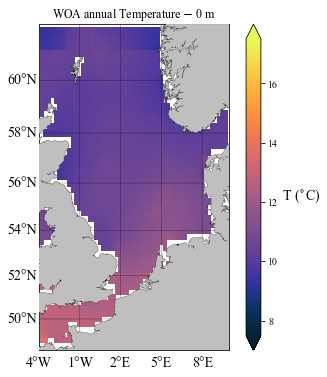

In [117]:
for idepth, depth in enumerate(depthWOA):
    
    fname = "{}-
    figname = os.path.join(figdir, fname)
    logger.info("Working on depth: {} m".format(depth))
    make_2Dplot(lonWOA, latWOA, T_WOA[idepth,:,:], 
                depth=depth, product="WOA annual", gi)